In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
import tkinter as tk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

LECTURA DATA SET 

In [2]:
import pandas as pd

def leer_excel(ruta_archivo):
    try:
        # Lee el archivo de Excel
        datos = pd.read_excel(ruta_archivo, engine='openpyxl')
        
        # Imprime los datos en pantalla
        print("Contenido del archivo de Excel:")
        print(datos)
        
        return datos
    
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None

# Ejemplo de uso de la función
archivo_excel = "DataSextoProcesamiento.xlsx"
datos = leer_excel(archivo_excel)


Contenido del archivo de Excel:
       Ruta  Hora  Dia  Cond_Ruta  #Veh_Disp_x_rut  demanda
0         1     3    3          1                3        3
1         1     3    3          2                3        3
2         1     3    3          3                3        3
3         1     3    3          1                3        3
4         1     3    3          2                3        3
...     ...   ...  ...        ...              ...      ...
15115    40     1    1          2                1        1
15116    40     1    1          3                1        1
15117    40     1    1          1                1        1
15118    40     1    1          2                1        1
15119    40     1    1          3                1        1

[15120 rows x 6 columns]


Min Max para normalizar #Veh_x_ruta

In [3]:
# Encuentra el valor mínimo y máximo en #Veh_x_rut
#min_original = datos['#Veh_x_rut'].min()
#max_original = datos['#Veh_x_rut'].max()

# Calcula el rango original
#rango_original = max_original - min_original

# Define el rango deseado
#rango_deseado = 2

# Define el valor mínimo y máximo deseado
#min_deseado = 1
#max_deseado = 3

# Aplica Min-Max Scaling para normalizar #Veh_x_rut en el rango de 1 a 3
#datos['#Veh_x_rut_normalizado'] = ((datos['#Veh_x_rut'] - min_original) / rango_original) * rango_deseado + min_deseado

KeyError: '#Veh_x_rut'

In [ ]:
# Muestra las primeras filas del DataFrame para verificar la normalización de #Veh_x_rut
print(datos.head())

   hora   Ruta   #Veh_x_rut  Cond_Ruta   Dia_Semana   demanda  \
0      3      1           3           3            3        3   
1      3      1           3           2            3        2   
2      1      1           5           2            3        1   
3      2      1           3           3            3        3   
4      1      1           3           1            3        2   

   #Veh_x_rut_normalizado  
0                     2.0  
1                     2.0  
2                     3.0  
3                     2.0  
4                     2.0  


SEPARACION DE CARACTERISTICAS Y ETIQUETAS

In [4]:
X = datos[['Ruta', 'Hora', 'Dia', 'Cond_Ruta', '#Veh_Disp_x_rut']]
Y = datos['demanda']  

NORMALIZACÍON DE LOS DATOS (Metodo "Z-SCORE"):

 Esta técnica escala los datos para que tengan la propiedad de una distribución normal estándar con media 0 y desviación estándar 1

In [5]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar los datos utilizando Z-score
X_norm = scaler.fit_transform(X)

# X_norm  contiene los datos normalizados con Z-score
## Normalizar los datos de prueba utilizando el mismo objeto StandardScaler
#X_test_norm = scaler.transform(X_test)


DIVISION DE DATOS: 80% para entrenamiento y 20% para prueba.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

FASE DE DISEÑO DE LA MLP  

In [7]:

model = Sequential()
#Se agrega capa inicial con 5 Neuronas funcion de activacion " relu "
model.add(Dense(units=5, input_dim=5, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))

#error cuadrático medio como- función de pérdida/  adam para ajustar los pesos de la red durante el entrenamiento.
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

#Guarda el porcentaje de perdida para graficar  

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))




Epoch 1/100
378/378 [==============================] - 7s 8ms/step - loss: 0.9935 - accuracy: 0.2358 - val_loss: 0.5839 - val_accuracy: 0.2556
Epoch 2/100
378/378 [==============================] - 4s 11ms/step - loss: 0.5419 - accuracy: 0.2486 - val_loss: 0.5171 - val_accuracy: 0.2556
Epoch 3/100
378/378 [==============================] - 8s 22ms/step - loss: 0.5105 - accuracy: 0.2486 - val_loss: 0.5063 - val_accuracy: 0.2556
Epoch 4/100
378/378 [==============================] - 11s 28ms/step - loss: 0.5020 - accuracy: 0.2486 - val_loss: 0.4978 - val_accuracy: 0.2556
Epoch 5/100
378/378 [==============================] - 10s 27ms/step - loss: 0.4959 - accuracy: 0.2486 - val_loss: 0.4929 - val_accuracy: 0.2556
Epoch 6/100
378/378 [==============================] - 6s 17ms/step - loss: 0.4914 - accuracy: 0.2486 - val_loss: 0.4894 - val_accuracy: 0.2556
Epoch 7/100
378/378 [==============================] - 4s 10ms/step - loss: 0.4868 - accuracy: 0.2486 - val_loss: 0.4829 - val_accuracy

FASE DE PRODUCCION 

In [8]:
loss = model.evaluate(X_test, Y_test)
# Calcular el porcentaje de pérdida
rango_etiquetas = 3 - 1  # Rango de las etiquetas (de 1 a 3 en este caso)
 # Calcular el porcentaje de pérdida
porcentaje_perdida = (loss[0] / rango_etiquetas) * 100
#porcentaje_perdida = (loss / rango_etiquetas) * 100

# Mostrar el porcentaje de pérdida
print(f"Porcentaje de error en el conjunto de prueba: {porcentaje_perdida:.2f}%")

 1/95 [..............................] - ETA: 9s - loss: 0.1378 - accuracy: 0.4688

95/95 [==============================] - 0s 4ms/step - loss: 0.1145 - accuracy: 0.2556
Porcentaje de error en el conjunto de prueba: 5.72%


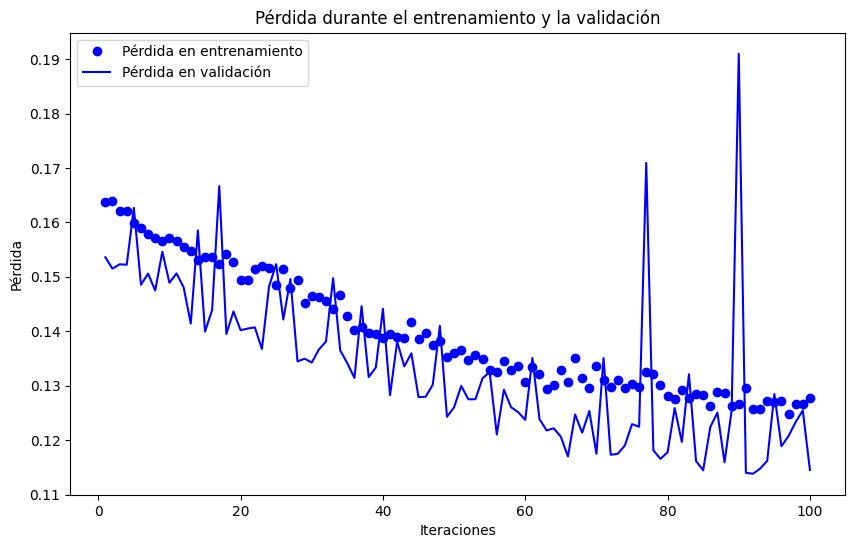

In [9]:
# Obtener la pérdida del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear un gráfico de línea para mostrar la pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


95/95 [==============================] - 1s 3ms/step


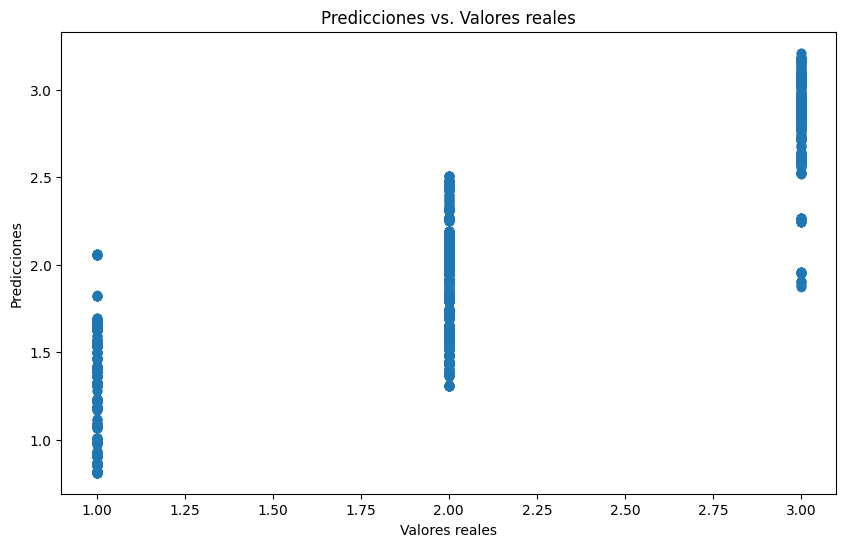

In [10]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

 1/95 [..............................] - ETA: 5s

95/95 [==============================] - 0s 3ms/step


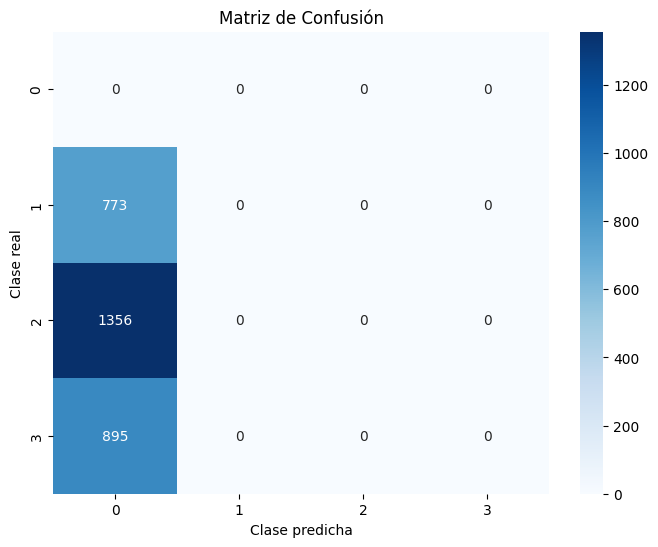

In [11]:
# Obtener las probabilidades de las clases del modelo
probabilidades = model.predict(X_test)

# Obtener las clases predichas
predictions = np.argmax(probabilidades, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión')
plt.show()

#matriz de confusión

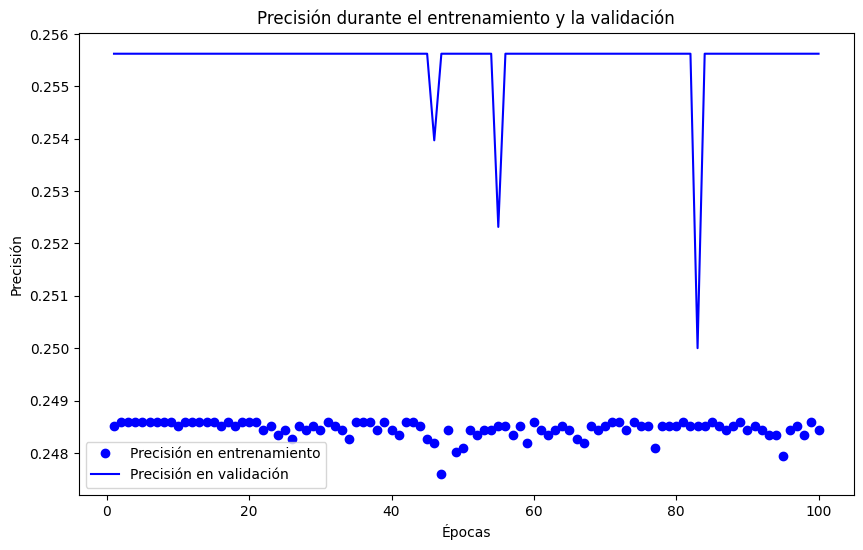

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Precisión en entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión en validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


INTERFACE GRAFICA 

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Función para entrenar la red neuronal con los nuevos valores
def entrenar_red():
    try:
        num_capas_ocultas = int(entry_capas_ocultas.get())
        num_epocas = int(entry_epocas.get())
        eta = float(entry_eta.get())
        
        # Aquí puedes poner el código para entrenar la red neuronal con los nuevos valores
        
        messagebox.showinfo("Éxito", "Red neuronal entrenada con nuevos valores.")
    except Exception as e:
        messagebox.showerror("Error", f"Error: {str(e)}")

# Crear la ventana principal
root = tk.Tk()
root.title("Interfaz de Red Neuronal")

# Crear etiquetas y campos de entrada para los hiperparámetros
label_capas_ocultas = ttk.Label(root, text="Número de Capas Ocultas:")
label_capas_ocultas.pack()
entry_capas_ocultas = ttk.Entry(root)
entry_capas_ocultas.pack()

label_epocas = ttk.Label(root, text="Número de Épocas:")
label_epocas.pack()
entry_epocas = ttk.Entry(root)
entry_epocas.pack()

label_eta = ttk.Label(root, text="ETA:")
label_eta.pack()
entry_eta = ttk.Entry(root)
entry_eta.pack()

# Botón para entrenar la red neuronal
btn_entrenar = ttk.Button(root, text="Entrenar Red Neuronal", command=entrenar_red)
btn_entrenar.pack()

# Iniciar el bucle de la interfaz gráfica
root.mainloop()
